In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
#import statsmodels.api as sm
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
#import subprocess
base=''
#read in 1000 BRAINS subject list
dfs=pd.read_table(base+'Visit1_Age.txt',sep='\t')
#read in PSMD subjects list
dfm=pd.read_csv(base+'TOTAL_METRICS_Skel_header.csv',sep=' ')
#merge keeps both key columns - figure out how to avoid this
df_plot=dfm.merge(dfs,left_on='NAME', right_on='Identifiers',sort=True)
df_plot=df_plot.drop(['Identifiers', 'Visit','NAME'], axis=1)

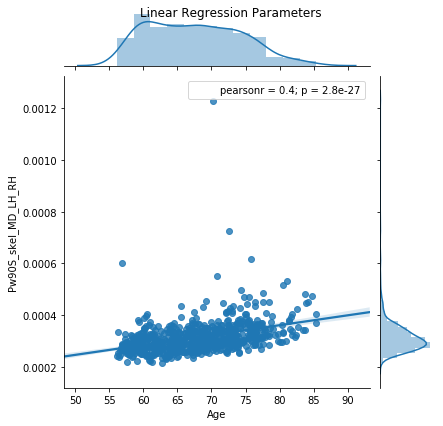

In [2]:
#example linear regression parameters for the PSMD metric alone
g=sns.jointplot(x='Age',y='Pw90S_skel_MD_LH_RH',data=df_plot,kind='reg')
fig = g.fig 
fig.suptitle('Linear Regression Parameters', fontsize=12)
plt.show()

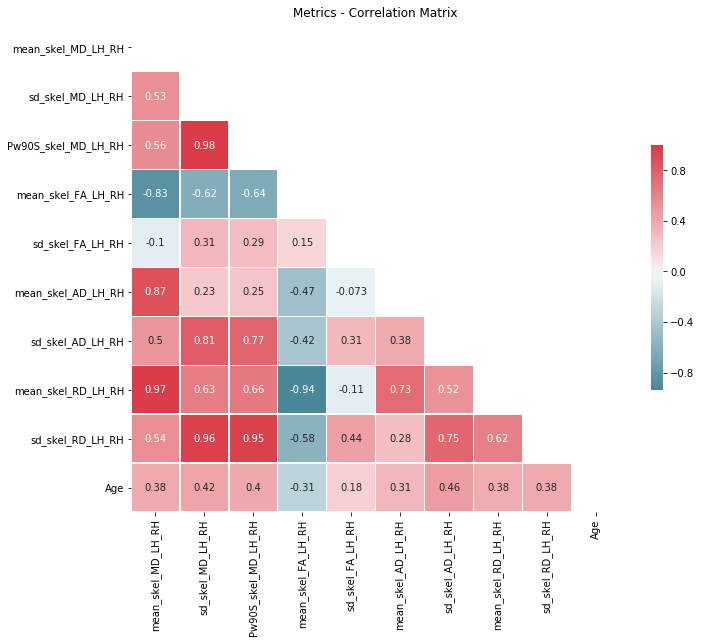

In [3]:
corr=df_plot.corr()
#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('Metrics - Correlation Matrix')
plt.show()

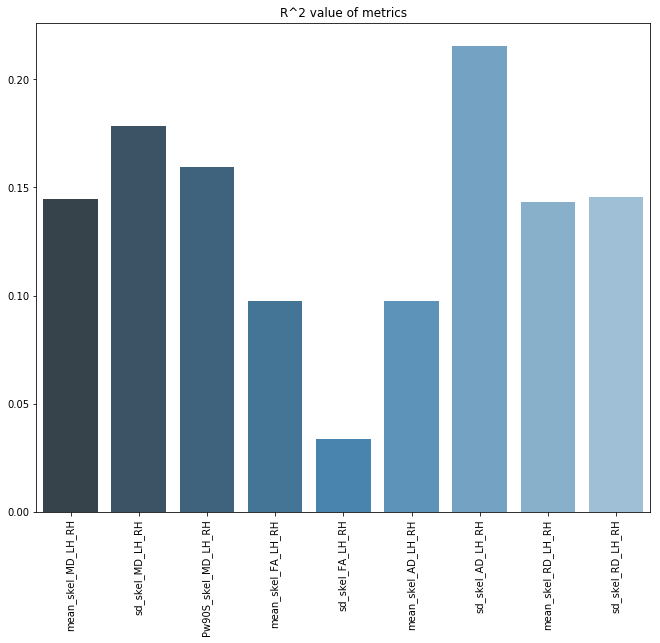

In [4]:
#function to return linreg params
def scp_linreg_metric(metric):
    x=df_plot.Age.values
    y=df_plot[metric].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return slope, r_value, r_value**2, p_value

a=[]
y=np.array([])
#plot R^2 values
for i in df_plot.columns:
    if 'LH' in i:
        s,_,r2,_=scp_linreg_metric(i)
        a.append(i)
        y=np.append(y,r2)
f, ax = plt.subplots(figsize=(11, 9))
g=sns.barplot(x=a,y=y,palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('R^2 value of metrics')
plt.show()

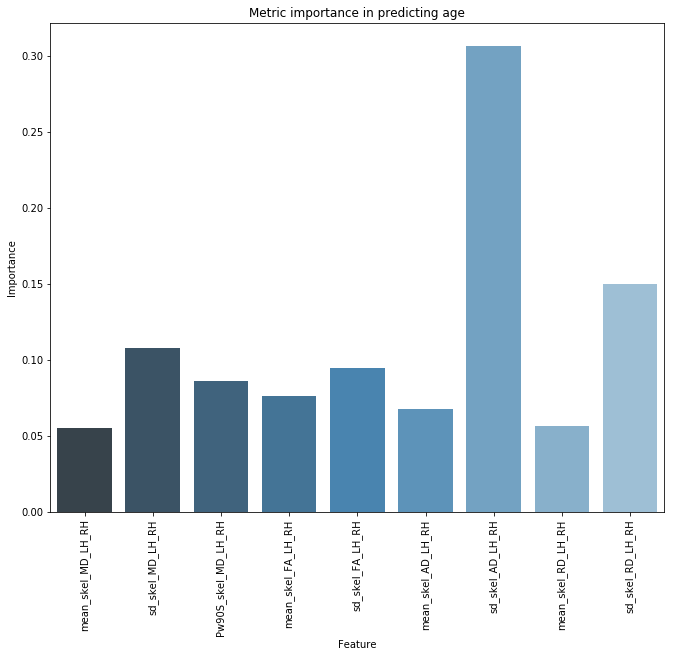

In [19]:
y=df_plot.Age
X=df_plot.drop('Age',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)
clf = RandomForestRegressor(n_jobs=2, n_estimators=1000)
model = clf.fit(X_train, y_train)
f, ax = plt.subplots(figsize=(11, 9))
#g=sns.barplot(x=X_train.columns.tolist(),y=model.feature_importances_)
g=sns.barplot(x=X_train.columns.tolist(),y=model.feature_importances_,palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set(xlabel='Feature', ylabel='Importance')
g.set_title('Metric importance in predicting age')
plt.show()